# **Data preprocessing**

In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.feature_selection import mutual_info_regression
from sklearn.metrics import accuracy_score

In [2]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Project8/taxi_trip_pricing.csv')

df.head()

,Trip_Distance_km,Time_of_Day,Day_of_Week,Passenger_Count,Traffic_Conditions,Weather,Base_Fare,Per_Km_Rate,Per_Minute_Rate,Trip_Duration_Minutes,Trip_Price
0,19.35,Morning,Weekday,3.0,Low,Clear,3.56,0.80,0.32,53.82,36.2624
1,47.59,Afternoon,Weekday,1.0,High,Clear,NaN,0.62,0.43,40.57,NaN
2,36.87,Evening,Weekend,1.0,High,Clear,2.70,1.21,0.15,37.27,52.9032
3,30.33,Evening,Weekday,4.0,Low,NaN,3.48,0.51,0.15,116.81,36.4698
4,NaN,Evening,Weekday,3.0,High,Clear,2.93,0.63,0.32,22.64,15.6180


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Trip_Distance_km       950 non-null    float64
 1   Time_of_Day            950 non-null    object 
 2   Day_of_Week            950 non-null    object 
 3   Passenger_Count        950 non-null    float64
 4   Traffic_Conditions     950 non-null    object 
 5   Weather                950 non-null    object 
 6   Base_Fare              950 non-null    float64
 7   Per_Km_Rate            950 non-null    float64
 8   Per_Minute_Rate        950 non-null    float64
 9   Trip_Duration_Minutes  950 non-null    float64
 10  Trip_Price             951 non-null    float64
dtypes: float64(7), object(4)
memory usage: 86.1+ KB


In [4]:
df.isnull().sum()

,0
Trip_Distance_km,50
Time_of_Day,50
Day_of_Week,50
Passenger_Count,50
Traffic_Conditions,50
Weather,50
Base_Fare,50
Per_Km_Rate,50
Per_Minute_Rate,50
Trip_Duration_Minutes,50


In [5]:
missing_cols = df.columns[df.isnull().sum()>0]

for column in missing_cols:
  if df[column].dtype=='object':
    df[column].fillna(df[column].mode()[0], inplace=True)
  else:
    df[column].fillna(df[column].mean(), inplace=True)


<ipython-input-5-ee85d1da00d5>:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column].fillna(df[column].mean(), inplace=True)
<ipython-input-5-ee85d1da00d5>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try usin

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Trip_Distance_km       1000 non-null   float64
 1   Time_of_Day            1000 non-null   object 
 2   Day_of_Week            1000 non-null   object 
 3   Passenger_Count        1000 non-null   float64
 4   Traffic_Conditions     1000 non-null   object 
 5   Weather                1000 non-null   object 
 6   Base_Fare              1000 non-null   float64
 7   Per_Km_Rate            1000 non-null   float64
 8   Per_Minute_Rate        1000 non-null   float64
 9   Trip_Duration_Minutes  1000 non-null   float64
 10  Trip_Price             1000 non-null   float64
dtypes: float64(7), object(4)
memory usage: 86.1+ KB


In [7]:

categorical_col = df.select_dtypes(include=['object', 'category']).columns

categorical_col


Index(['Time_of_Day', 'Day_of_Week', 'Traffic_Conditions', 'Weather'], dtype='object')

In [8]:
label_encod = LabelEncoder()

df['Time_of_Day'] = label_encod.fit_transform(df['Time_of_Day'])

In [9]:
categorical_col = df.select_dtypes(include=['object', 'category']).columns

categorical_col

Index(['Day_of_Week', 'Traffic_Conditions', 'Weather'], dtype='object')

**One hot encoding**

In [10]:
encoder = OneHotEncoder()
encoded_array = encoder.fit_transform(df[categorical_col])
encoded_df = pd.DataFrame(encoded_array.toarray(), columns=encoder.get_feature_names_out(categorical_col))
df = df.drop(columns=categorical_col)
df = pd.concat([df, encoded_df], axis=1)
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Trip_Distance_km           1000 non-null   float64
 1   Time_of_Day                1000 non-null   int64  
 2   Passenger_Count            1000 non-null   float64
 3   Base_Fare                  1000 non-null   float64
 4   Per_Km_Rate                1000 non-null   float64
 5   Per_Minute_Rate            1000 non-null   float64
 6   Trip_Duration_Minutes      1000 non-null   float64
 7   Trip_Price                 1000 non-null   float64
 8   Day_of_Week_Weekday        1000 non-null   float64
 9   Day_of_Week_Weekend        1000 non-null   float64
 10  Traffic_Conditions_High    1000 non-null   float64
 11  Traffic_Conditions_Low     1000 non-null   float64
 12  Traffic_Conditions_Medium  1000 non-null   float64
 13  Weather_Clear              1000 non-null   float6

**Data Spliting**

In [33]:
x = df.drop('Trip_Price', axis=1)
y = df['Trip_Price']

In [12]:
x_train,x_temp,y_train, y_temp=train_test_split(x,y,test_size=0.30, random_state=42)
x_val,x_test,y_val, y_test=train_test_split(x_temp,y_temp,test_size=0.5,random_state=42)


**Data scaling**

In [13]:
scaler = StandardScaler()


x_train_scaled = scaler.fit_transform(x_train)

x_test_scaled = scaler.transform(x_test)
x_val_scaled = scaler.transform(x_val)

# **Baseline**

In [14]:
X = df.copy()
y = X.pop("Trip_Price")

baseline = DecisionTreeRegressor(criterion="absolute_error", random_state=42)
baseline_score = cross_val_score(
    baseline, X, y, cv=5, scoring="neg_mean_absolute_error"
)
baseline_score = -1 * baseline_score.mean()

print(f"MAE Baseline Score: {baseline_score:.4}")

MAE Baseline Score: 9.987


In [ ]:
#MAE Baseline Score: 9.987

**Feature engineering**

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Trip_Distance_km           1000 non-null   float64
 1   Time_of_Day                1000 non-null   int64  
 2   Passenger_Count            1000 non-null   float64
 3   Base_Fare                  1000 non-null   float64
 4   Per_Km_Rate                1000 non-null   float64
 5   Per_Minute_Rate            1000 non-null   float64
 6   Trip_Duration_Minutes      1000 non-null   float64
 7   Trip_Price                 1000 non-null   float64
 8   Day_of_Week_Weekday        1000 non-null   float64
 9   Day_of_Week_Weekend        1000 non-null   float64
 10  Traffic_Conditions_High    1000 non-null   float64
 11  Traffic_Conditions_Low     1000 non-null   float64
 12  Traffic_Conditions_Medium  1000 non-null   float64
 13  Weather_Clear              1000 non-null   float6

In [16]:
X["Total_Fare"] = X["Base_Fare"] + (X["Trip_Distance_km"] / X["Per_Km_Rate"]) + (X["Trip_Duration_Minutes"] / X["Per_Minute_Rate"])
X["Passenger_to_Distance_Ratio"] = X["Passenger_Count"] / X["Trip_Distance_km"]
X["Distance_to_Duration_Ratio"] = X["Trip_Distance_km"] / X["Trip_Duration_Minutes"]
X["Wheather_Impac"] = X["Weather_Clear"] + X["Weather_Rain"] + X["Weather_Snow"]


In [17]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Trip_Distance_km             1000 non-null   float64
 1   Time_of_Day                  1000 non-null   int64  
 2   Passenger_Count              1000 non-null   float64
 3   Base_Fare                    1000 non-null   float64
 4   Per_Km_Rate                  1000 non-null   float64
 5   Per_Minute_Rate              1000 non-null   float64
 6   Trip_Duration_Minutes        1000 non-null   float64
 7   Day_of_Week_Weekday          1000 non-null   float64
 8   Day_of_Week_Weekend          1000 non-null   float64
 9   Traffic_Conditions_High      1000 non-null   float64
 10  Traffic_Conditions_Low       1000 non-null   float64
 11  Traffic_Conditions_Medium    1000 non-null   float64
 12  Weather_Clear                1000 non-null   float64
 13  Weather_Rain       

In [26]:
model = DecisionTreeRegressor(criterion="absolute_error", random_state=42)
score = cross_val_score(model, X, y, cv=5, scoring="neg_mean_absolute_error")
score = -1 * score.mean()

print(f"MAE Score with Synthetic Features: {score:.4f}")

MAE Score with Synthetic Features: 0.6093


In [27]:
#Random Forest
rf_model = RandomForestRegressor(criterion="absolute_error", random_state=42)
rf_score = cross_val_score(rf_model, X, y, cv=5, scoring="neg_mean_absolute_error")
rf_score = -1 * rf_score.mean()

print(f"MAE Score with Random Forest: {rf_score:.4f}")

MAE Score with Random Forest: 0.3483


In [ ]:
#MAE Baseline Score: 9.987
#MAE Score with Synthetic Features: 0.6093
#MAE Score with Random Forest: 0.3483

**Correlation**

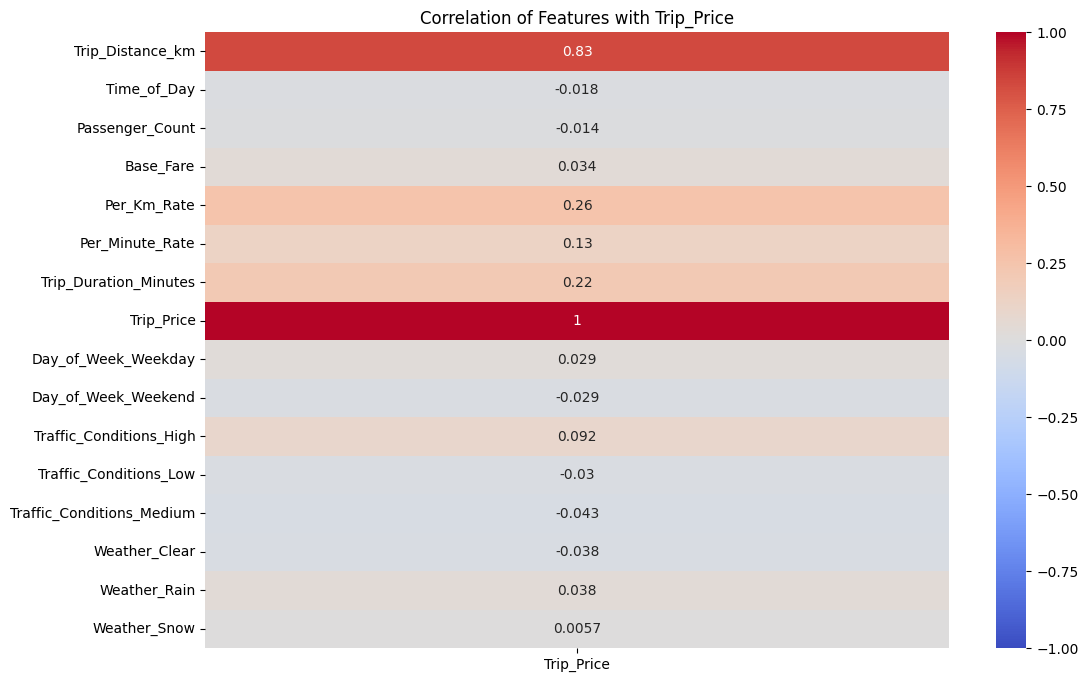

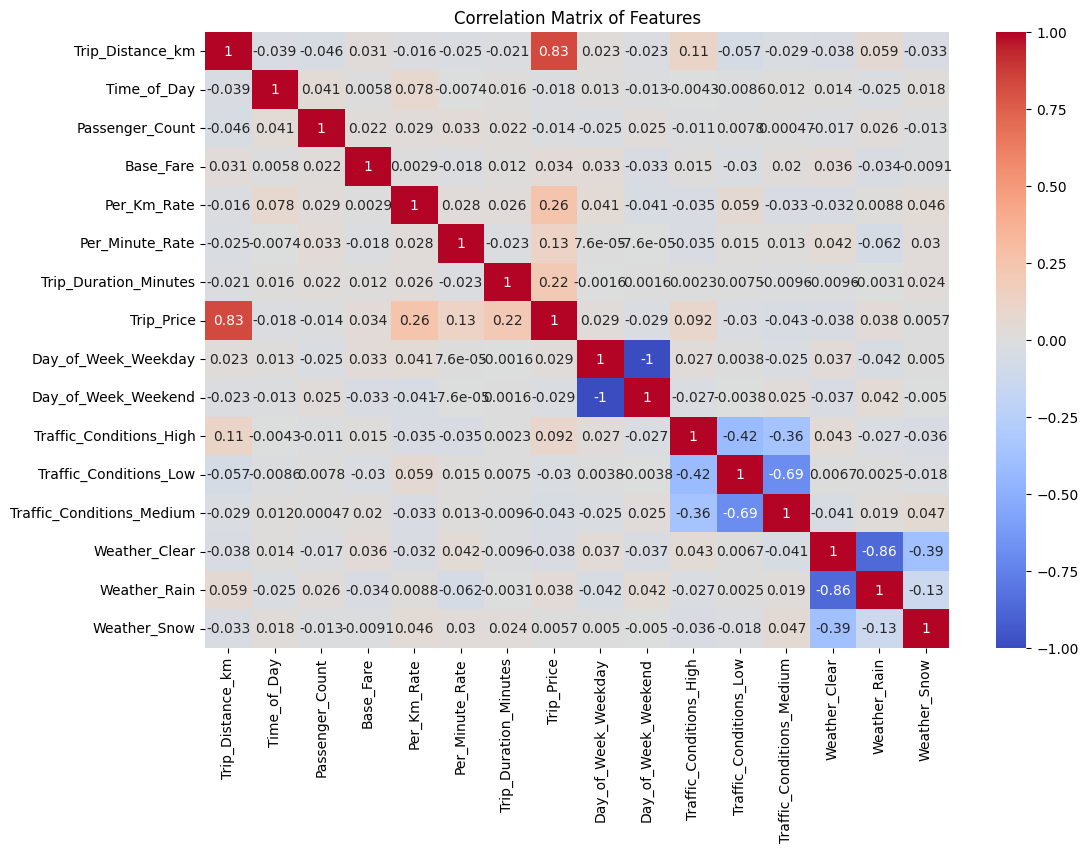

In [22]:

X = df.copy()
correlation_matrix = X.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix[['Trip_Price']], annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Correlation of Features with Trip_Price")
plt.show()

# Check the correlation between all features to spot any potential multicollinearity
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Correlation Matrix of Features")
plt.show()

**Comparing models**

In [25]:
models = {
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(random_state=42),
}

for model_name, model in models.items():
    score = cross_val_score(model, X, y, cv=5, scoring="neg_mean_absolute_error")
    score = -1 * score.mean()
    print(f"{model_name} MAE Score: {score:.4f}")

Decision Tree MAE Score: 0.4429
Random Forest MAE Score: 0.3868


In [28]:
models = {
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(random_state=42),
}

# Baseline model - Decision Tree
baseline_model = DecisionTreeRegressor(random_state=42)
baseline_score = cross_val_score(baseline_model, X, y, cv=5, scoring="neg_mean_absolute_error")
baseline_score = -1 * baseline_score.mean()

print(f"Baseline Model (Decision Tree) MAE Score: {baseline_score:.4f}")

# Compare other models
for model_name, model in models.items():
    score = cross_val_score(model, X, y, cv=5, scoring="neg_mean_absolute_error")
    score = -1 * score.mean()
    print(f"{model_name} MAE Score: {score:.4f}")

Baseline Model (Decision Tree) MAE Score: 0.4429
Decision Tree MAE Score: 0.4429
Random Forest MAE Score: 0.3868


# Mutual Information

In [29]:
df[['Trip_Price', 'Trip_Distance_km']] = df[['Trip_Distance_km', 'Trip_Price']]

df.columns = df.columns.str.replace('Trip_Distance_km', 'Temp').str.replace('Trip_Price', 'Trip_Distance_km').str.replace('Temp', 'Trip_Price')

In [31]:
df.head()

,Trip_Price,Time_of_Day,Passenger_Count,Base_Fare,Per_Km_Rate,Per_Minute_Rate,Trip_Duration_Minutes,Trip_Distance_km,Day_of_Week_Weekday,Day_of_Week_Weekend,Traffic_Conditions_High,Traffic_Conditions_Low,Traffic_Conditions_Medium,Weather_Clear,Weather_Rain,Weather_Snow
0,36.262400,2,3.0,3.560000,0.80,0.32,53.82,19.350000,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1,56.874773,0,1.0,3.502989,0.62,0.43,40.57,47.590000,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2,52.903200,1,1.0,2.700000,1.21,0.15,37.27,36.870000,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
3,36.469800,1,4.0,3.480000,0.51,0.15,116.81,30.330000,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
4,15.618000,1,3.0,2.930000,0.63,0.32,22.64,27.070547,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


In [34]:
x.head()

,Time_of_Day,Passenger_Count,Base_Fare,Per_Km_Rate,Per_Minute_Rate,Trip_Duration_Minutes,Trip_Distance_km,Day_of_Week_Weekday,Day_of_Week_Weekend,Traffic_Conditions_High,Traffic_Conditions_Low,Traffic_Conditions_Medium,Weather_Clear,Weather_Rain,Weather_Snow
0,2,3.0,3.560000,0.80,0.32,53.82,19.350000,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1,0,1.0,3.502989,0.62,0.43,40.57,47.590000,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2,1,1.0,2.700000,1.21,0.15,37.27,36.870000,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
3,1,4.0,3.480000,0.51,0.15,116.81,30.330000,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
4,1,3.0,2.930000,0.63,0.32,22.64,27.070547,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


In [36]:
mi_scores = mutual_info_regression(x, y)

In [37]:
mi_scores_df = pd.DataFrame(mi_scores, index=x.columns, columns=['MI Score'])
mi_scores_df = mi_scores_df.sort_values(by='MI Score', ascending=False)

print(mi_scores_df)

                           MI Score
Trip_Distance_km           0.393527
Per_Km_Rate                0.131517
Trip_Duration_Minutes      0.115705
Per_Minute_Rate            0.051713
Weather_Snow               0.011363
Traffic_Conditions_High    0.010616
Day_of_Week_Weekday        0.002070
Time_of_Day                0.000000
Passenger_Count            0.000000
Base_Fare                  0.000000
Day_of_Week_Weekend        0.000000
Traffic_Conditions_Low     0.000000
Traffic_Conditions_Medium  0.000000
Weather_Clear              0.000000
Weather_Rain               0.000000


In [38]:
def plot_mi_scores(scores):
  scores = scores.sort_values(ascending=True)
  width = np.arange(len(scores))
  ticks = list(scores.index)

  plt.barh(width, scores)
  plt.yticks(width, ticks)
  plt.title("Mutual Information Scores")
  plt.xlabel("Mutual Information Scores")
  plt.ylabel("Features")
  plt.show()


plt.figure(dpi=100, figsize=(8, 5))
plot_mi_scores(mi_scores_df["MI Scores"])

KeyError: 'MI Scores'

<Figure size 800x500 with 0 Axes>

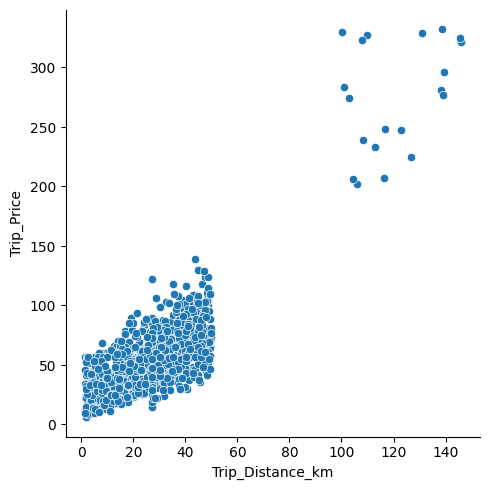

In [40]:
sns.relplot(x='Trip_Distance_km', y='Trip_Price', data=df)

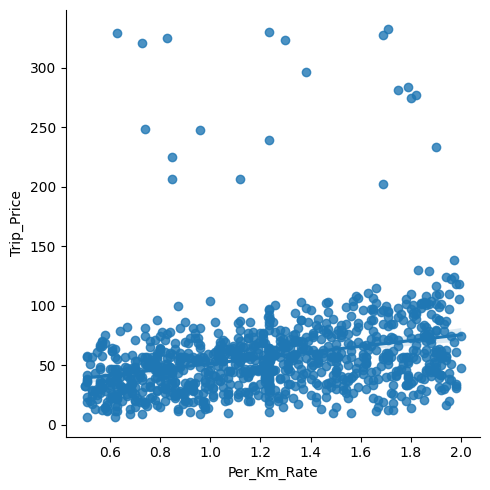

In [41]:
sns.lmplot(x='Per_Km_Rate', y='Trip_Price', data=df)

# New Section.